# Machine Learning Model to predicts the monthly rental of a house 

## 1. Introduction
This project focuses on building a model to predict monthly rental of a house.

The value of a house is more than just location and square footage. Houses have several features that make up it's value.We are going to take advantage of all the features to make accurate predictions about the rent of any house.

### Algorithm used:
  Decision Tree, GridSerachCV,Linear Regression
  
  
### Features:
Id: listing id
url: listing URL
region: craigslist region
region_url: region URL
type: housing type
sqfeet: total square footage
beds:number of beds
baths:number of bathrooms
cats_allowed: cats allowed boolean (1 = yes, 0 = no)
dogs_allowed: dogs allowed boolean
smoking_allowed: smoking allowed boolean
wheelchair_access: has wheelchair access boolean
electric_vehicle_charge: has electric vehicle charger boolean
comes_furnished: comes with furniture boolean
laundry_options: laundry options available
parking_options: parking options available
image_url: image URL
description: description by poster
lat: latitude
long: longitude
state: state of listing



### Target:
Monthly rent of the House

## 2. Solution approach Using Decision Tree

   2.1 Import Necessary Libraries

   2.2 Loading the House Price Dataset

   2.3 Take a Quick Look at the Data Structure

   2.4.Selecting Features to a Model Build
   
2.5 Information About Data
   
2.6 Data Preprocessing (Analysis (EDA))
   
2.7 Dealing with Outliers
   
2.8 Filtering Categorical Data
   
2.9 Dividing the Dataset into Features and Label
   
2.10 Checking the relationship of Features with Label
   
2.12 Checking for the multicollinearity in Features

2.13 Data splitting for training the Model

2.14 Building a Model Using The Decision Tree
   
2.15 Calculating the Accuracy of Model

### 2.01 Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2.02 Let's Load the House Pricing Dataset

In [2]:
#Loading House_train CSV file by using read_csv method in pandas
house_train=pd.read_csv('housing_train.csv')

### 2.03 Take a Quick Look at the Dataset

In [134]:
house_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [53]:
house_train.shape

(265190, 22)

In [7]:
#Lets display the features
house_train.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [146]:
house_train.description.value_counts().count()

195471

### 2.04 Selecting The Features

#### Data Cleaning:
Features such as id,url,region_url and description, seem to be not necessary for model build, lets delete in next step.

In [3]:
# Lets Delete some Features which not impacting on model and Create a new DataFrame with selected features.
house_train_next=house_train.drop(columns=['id','url','region_url','image_url','description'])
house_train_next.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al


### 2.05 Information About Data

In [25]:
house_train_next.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


Beds have outliers, it showing maximum value is 1100, it is not realistic, lets check the values in beds and consider th realistic values.

In [11]:
house_train_next.beds.value_counts()

2       120149
1        80527
3        46968
4         8177
0         7529
5         1590
6          185
7           40
8           22
1100         2
1000         1
Name: beds, dtype: int64

Here beds values till 8 is possible, but 1100 and 1000 is outliers, lets drop those unrealistic values in next step.

In [55]:
house_train_next.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   265190 non-null  object 
 1   price                    265190 non-null  int64  
 2   type                     265190 non-null  object 
 3   sqfeet                   265190 non-null  int64  
 4   beds                     265190 non-null  int64  
 5   baths                    265190 non-null  float64
 6   cats_allowed             265190 non-null  int64  
 7   dogs_allowed             265190 non-null  int64  
 8   smoking_allowed          265190 non-null  int64  
 9   wheelchair_access        265190 non-null  int64  
 10  electric_vehicle_charge  265190 non-null  int64  
 11  comes_furnished          265190 non-null  int64  
 12  laundry_options          210879 non-null  object 
 13  parking_options          170055 non-null  object 
 14  lat 

Showing Null values in Laundry_options,parking_options,lat,long and state

### 2.06 Data Preprocessing (Analysis (EDA))

In [4]:
#Lets Delete NaN values in the Dataset
house_train_next.dropna(inplace=True)

As we noted above, let's delete the unrealistic values from beds feature.

In [5]:
# Lets Delete The unrealistic data in Beds feature
house_train_next=house_train_next[house_train_next['beds']<9]

In [6]:
#Lets Drop region column
house_train_next=house_train_next.drop(columns=['region'])

In [7]:
#Lets Drop duplicates if any
house_train_next.drop_duplicates(inplace=True)

In [71]:
# Now checking the shape of Dataset again
house_train_next.shape

(88725, 16)

In [17]:
house_train_next.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,8.872500e+04,8.872500e+04,88725.000000,88725.000000,88725.000000,88725.000000,88725.000000,88725.000000,88725.000000,88725.000000,88725.000000,88725.000000
mean,3.354722e+04,1.317717e+03,1.977346,1.494303,0.700817,0.670341,0.591840,0.098879,0.026982,0.070611,38.138025,-95.035412
std,9.294276e+06,3.973274e+04,0.949876,0.622932,0.457903,0.470092,0.491496,0.298501,0.162032,0.256176,6.018952,18.826400
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.800000e+02,7.570000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.209200,-111.059000
50%,1.200000e+03,9.750000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.968100,-89.602600
75%,1.657000e+03,1.201000e+03,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.952600,-81.446000
max,2.768307e+09,8.388607e+06,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.993700,172.633000


Now looking the dataset is more better than before, baths have maximum value is 8.

In [47]:
house_train_next.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al


Here looking the baths value is not discrete, The number of baths is should discrete, so we will filter the discrete values.

In [48]:
#Checking the values in baths column
house_train_next.baths.value_counts()

1.0    46500
2.0    29101
1.5     5684
2.5     4029
3.0     1824
0.0      614
3.5      474
4.0      349
4.5       69
5.0       42
5.5       17
6.0       13
6.5        4
7.0        3
7.5        1
8.0        1
Name: baths, dtype: int64

In [8]:
# Filter the values in baths column
ind = np.where(np.isin(house_train_next['baths'], [1.5,2.5,3.5,4.5,5.5,6.5,7.5]))
ind

(array([    2,    66,    70, ..., 88721, 88723, 88724], dtype=int64),)

In [9]:
# Lets Drop the those values
house_train_next.drop(house_train_next.index[ind], axis=0, inplace=True)

In [142]:
house_train_next.shape

(78447, 16)

In [11]:
house_train_next.baths.value_counts()

1.0    46500
2.0    29101
3.0     1824
0.0      614
4.0      349
5.0       42
6.0       13
7.0        3
8.0        1
Name: baths, dtype: int64

In [10]:
# Reset the index
house_train_next.reset_index()

,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78442,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
78443,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
78444,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh
78445,265181,1601,apartment,1222,2,2.0,1,1,1,1,0,0,w/d in unit,off-street parking,39.9709,-82.9241,oh


### 2.08 Dealing with Outliers

In [12]:
non_cat_columns=['price','sqfeet','lat','long']

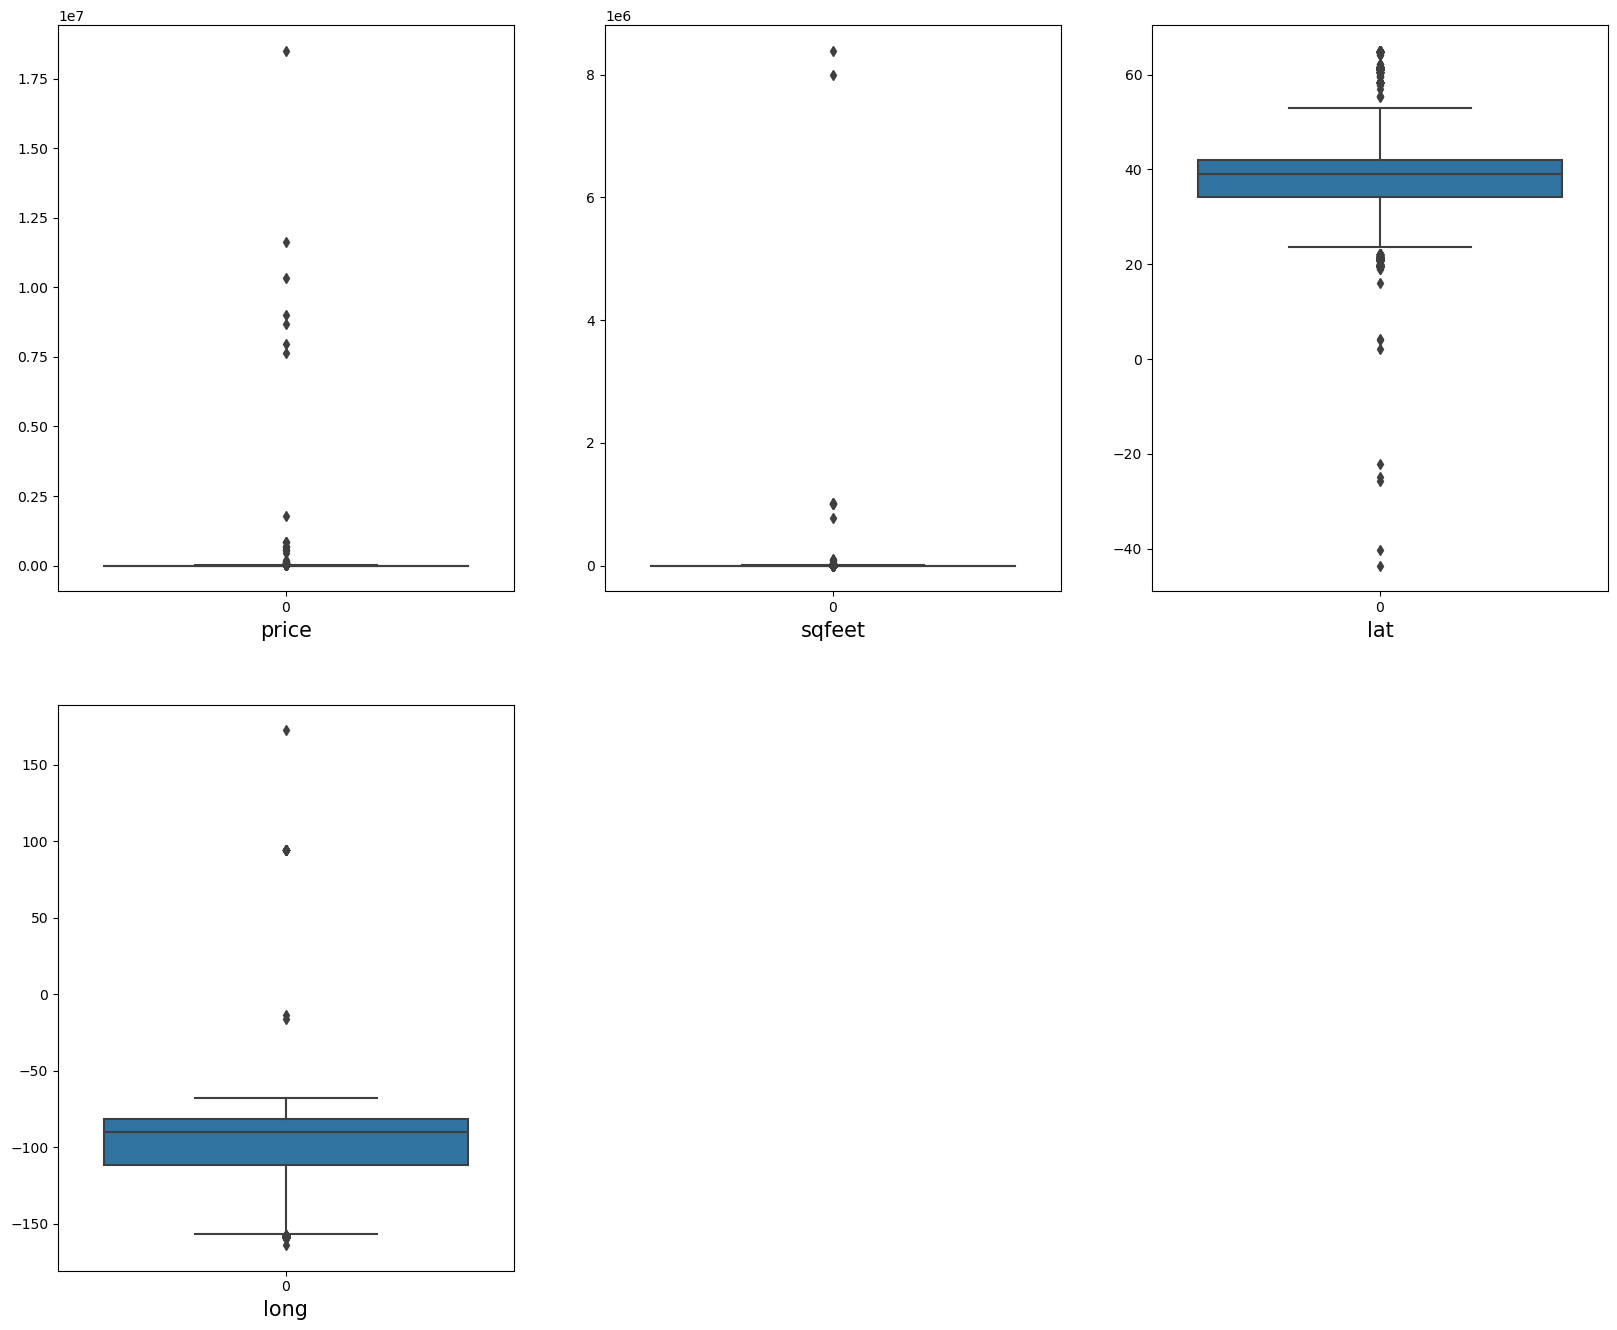

In [13]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in non_cat_columns:
    if graph<=9:    
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data= house_train_next[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1
plt.show()

In [14]:
# Find the IQR (inter quantile range) to identify outliers

# 1st quantile
q1 = house_train_next.quantile(0.25)

# 3rd quantile
q3 = house_train_next.quantile(0.75)

# IQR
iqr = q3 -q1

#### Outlier detection formula
higher side ==> Q3 + (1.5 * IQR)

lower side ==> Q1 - (1.5 * IQR)

Let's apply the formula and filter the outliers

#### Removing Outliers from Price column

In [15]:
# Lets remove the higher side of outliers in price column
price_high = (q3.price + (1.5 * iqr.price))
print ("Higher side outliers in price:",price_high)

index = np.where(house_train_next['price'] > price_high)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Higher side outliers in price: 2757.0


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74560,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
74561,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
74562,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh
74563,265181,1601,apartment,1222,2,2.0,1,1,1,1,0,0,w/d in unit,off-street parking,39.9709,-82.9241,oh


In [16]:
# Lets remove the lower side of outliers in price column
price_lower = (q3.price - (1.5 * iqr.price))
print ("Lower side outliers in price:",price_lower)

index = np.where(house_train_next['price'] < price_lower)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Lower side outliers in price: 495.0


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72986,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
72987,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
72988,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
72989,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


#### Removing Outliers from sqfeet column

In [17]:
# Lets remove the higher side of outliers in sqfeet column
sqfeet_high = (q3.sqfeet + (1.5 * iqr.sqfeet))
print ("Higher side outliers in sqfeet:",sqfeet_high)

index = np.where(house_train_next['sqfeet'] > sqfeet_high)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Higher side outliers in sqfeet: 1807.0


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
1,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
2,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,6,925,apartment,1350,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70263,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
70264,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
70265,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
70266,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


In [18]:
# Lets remove the lower side of outliers in sqfeet column
sqfeet_lower = (q3.sqfeet - (1.5 * iqr.sqfeet))
print ("Lower side outliers in sqfeet:",price_lower)

index = np.where(house_train_next['sqfeet'] < sqfeet_lower)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Lower side outliers in sqfeet: 495.0


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
1,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
2,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,6,925,apartment,1350,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66086,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
66087,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
66088,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
66089,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


#### Removing Outliers from lat column

In [19]:
# Lets remove the higher side of outliers in lat column
lat_high = (q3.lat + (1.5 * iqr.lat))
print ("Higher side outliers in lat:",lat_high)

index = np.where(house_train_next['lat'] > lat_high)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Higher side outliers in lat: 53.59834999999999


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
1,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
2,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,6,925,apartment,1350,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65189,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
65190,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
65191,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
65192,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


In [20]:
# Lets remove the lower side of outliers in lat column
lat_lower = (q3.lat - (1.5 * iqr.lat))
print ("Lower side outliers in lat:",lat_lower)

index = np.where(house_train_next['lat'] < lat_lower)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Lower side outliers in lat: 30.26525


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
1,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
2,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,6,925,apartment,1350,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58840,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
58841,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
58842,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
58843,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


#### Removing Outliers from long column

In [21]:
# Lets remove the higher side of outliers in long column
long_high = (q3.long + (1.5 * iqr.long))
print ("Higher side outliers in long:",long_high)

index = np.where(house_train_next['long'] > long_high)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Higher side outliers in long: -36.23225000000001


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
1,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
2,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,6,925,apartment,1350,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58824,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
58825,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
58826,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
58827,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


In [22]:
# Lets remove the lower side of outliers in long column
long_lower = (q3.long - (1.5 * iqr.long))
print ("Lower side outliers in long:",long_lower)

index = np.where(house_train_next['long'] < long_lower)

house_train_next = house_train_next.drop(house_train_next.index[index])

house_train_next.reset_index()

Lower side outliers in long: -126.74075


,index,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
1,3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
2,4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,6,925,apartment,1350,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58824,265172,750,apartment,690,1,1.0,1,1,1,1,0,0,w/d hookups,detached garage,39.9656,-83.1528,oh
58825,265175,1200,house,768,0,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,39.9942,-82.9921,oh
58826,265176,950,apartment,933,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,40.0347,-82.8726,oh
58827,265177,890,apartment,756,1,1.0,1,1,0,1,0,0,w/d hookups,detached garage,39.9346,-82.9297,oh


In [157]:
#Now lets check the dataset again

house_train_next.shape

(58829, 16)

In [23]:
# Copy the Cleaned Dataset for future
house_train_trial=house_train_next

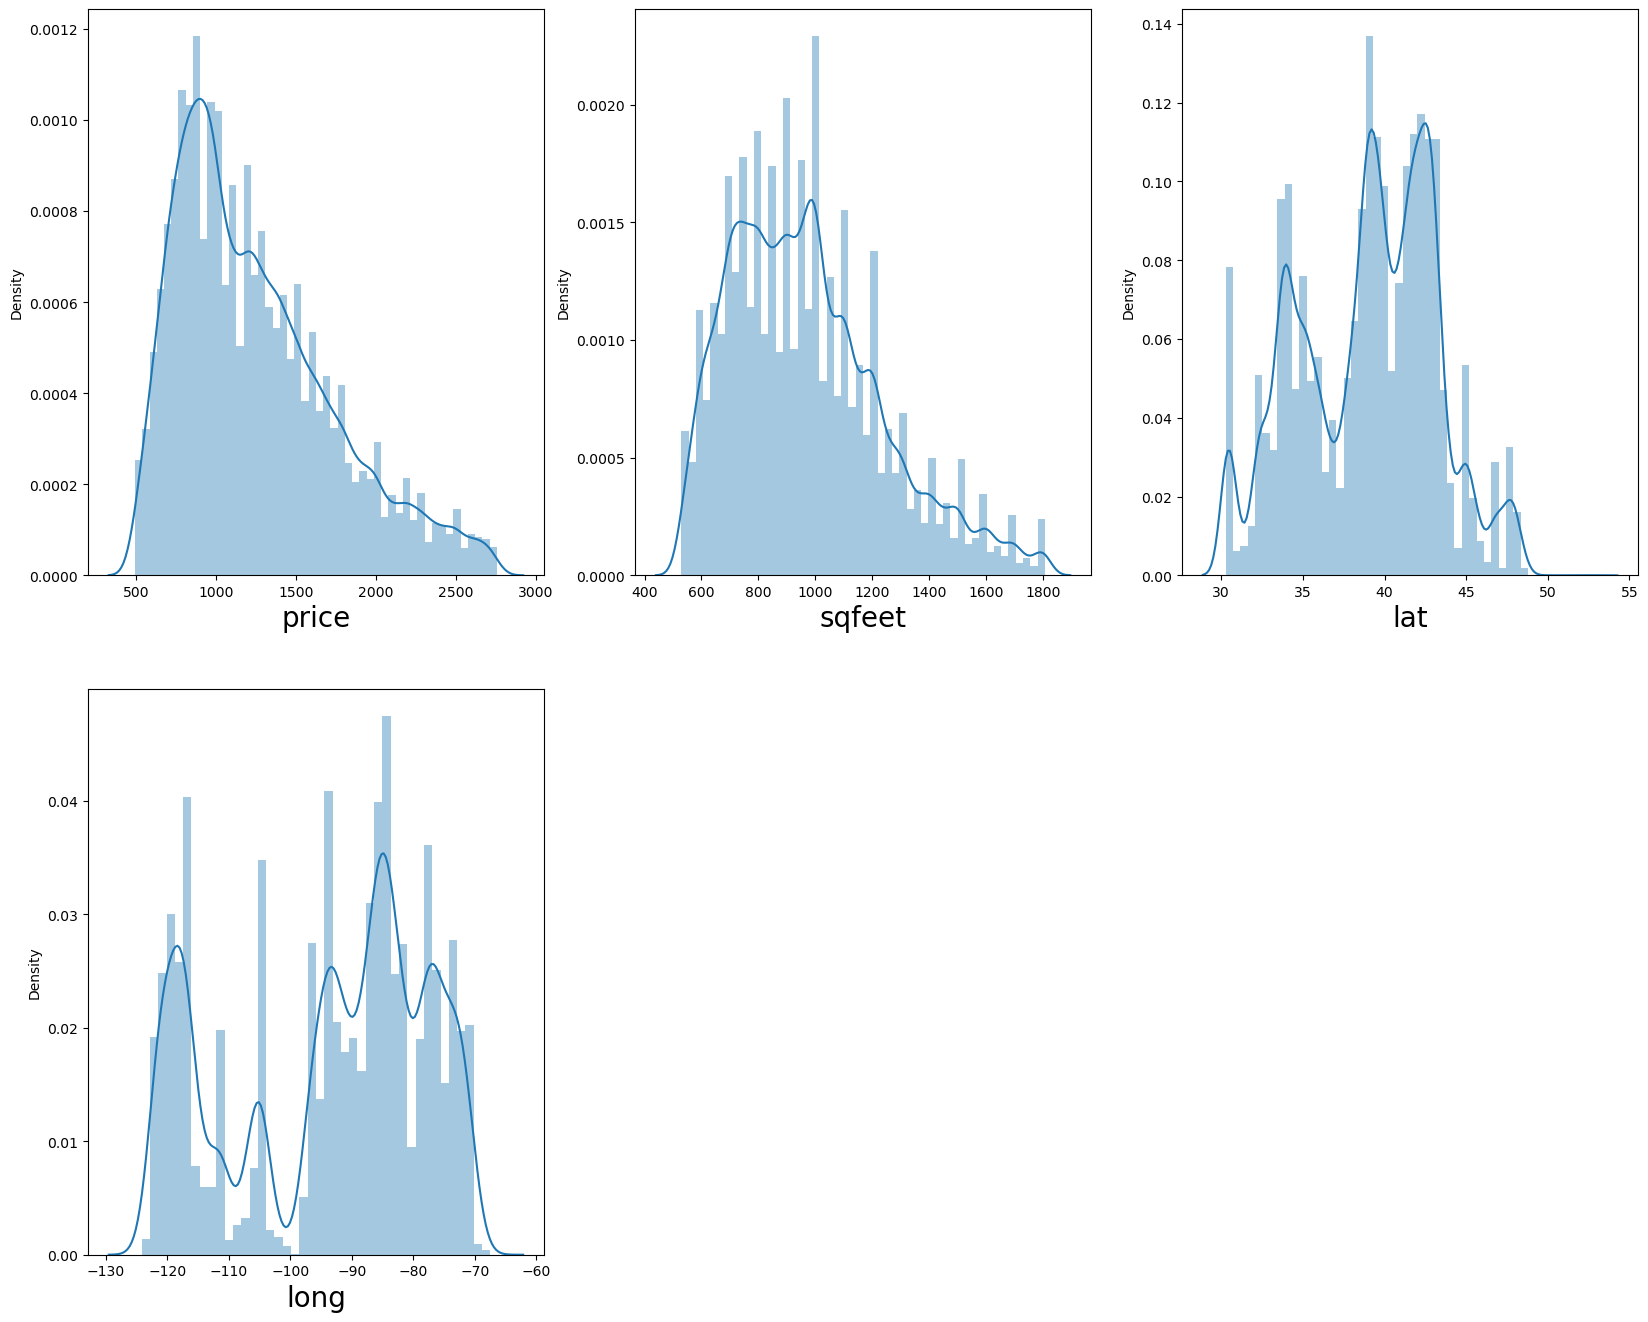

In [43]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in non_cat_columns:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(house_train_next[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### 2.08 Filter Categorical features

In [24]:
# Lets See Categorical columns list
categorical_columns=['type', 'laundry_options', 'parking_options', 'state']

### 2.09 Encoding categorical columns using get_dummies. 

In [25]:
#Import libraries for Encoding
from sklearn.preprocessing import OrdinalEncoder

In [26]:
house_train_dummies = pd.get_dummies(house_train_next[categorical_columns],drop_first=True) 

In [161]:
house_train_dummies.head()

,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse,...,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
#Check the shape
house_train_dummies.shape

(58829, 56)

### 2.10 Joining the Encoded Dataset with Original Dataset

In [27]:
#Join the Encoded dataset with original Dataset
house_train_next=house_train_next.join(house_train_dummies)

In [28]:
# Drop the Categorical columns
house_train_next.drop(columns=categorical_columns,axis=1,inplace=True)

In [53]:
house_train_next.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or
1,1120,1319,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,800,927,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,785,1047,2,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,900,1298,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,925,1350,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
house_train_next.shape

(58829, 68)

<AxesSubplot:xlabel='price', ylabel='baths'>

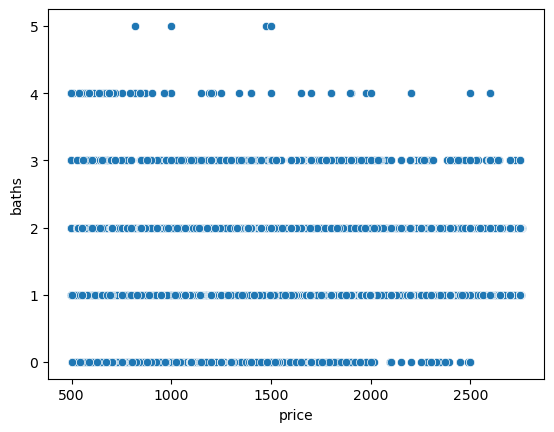

In [45]:
sns.scatterplot(x=house_train_next.price,y=house_train_next.baths)

### 2.11 Dividing the Dataset into Features and Label

In [29]:
#Lets separate the label column 'price' from the dataset and store in X, also create label dataset
X = house_train_next.drop(columns = ['price'])
y = house_train_next['price']

### 2.12 Data splitting for training the Model

In [30]:
#Lets split the Data using train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 41)

### 2.13 Building a Model Using The Decision Tree algorithm

In [31]:
#Building a Model using the Decision tree algorithm

clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
y_pred = clf.predict(x_test)

### 2.14 Checking the Metrics

In [33]:
#Lets import necessary libraries for metircs calculation
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error,mean_squared_error

In [34]:
clf.score(x_train,y_train)   # This is Training score

0.9973318458432308

In [35]:
clf.score(x_test,y_test)   # This is Testing score

0.725268384191044

In [36]:
accuracy_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [37]:
r2_score(y_test,y_pred)

0.725268384191044

In [38]:
#Metrics
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

MAE: 150.04342494619726
MSE: 66128.1017605054


## 4. Solution approach Using Linear Regression

In [212]:
# Lets See Categorical columns list
categorical_columns=['type', 'laundry_options', 'parking_options', 'state']

In [213]:
house_train_trial.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or
1,1120,1319,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,800,927,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,785,1047,2,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,900,1298,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,925,1350,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
house_train_trial.shape

(58829, 12)

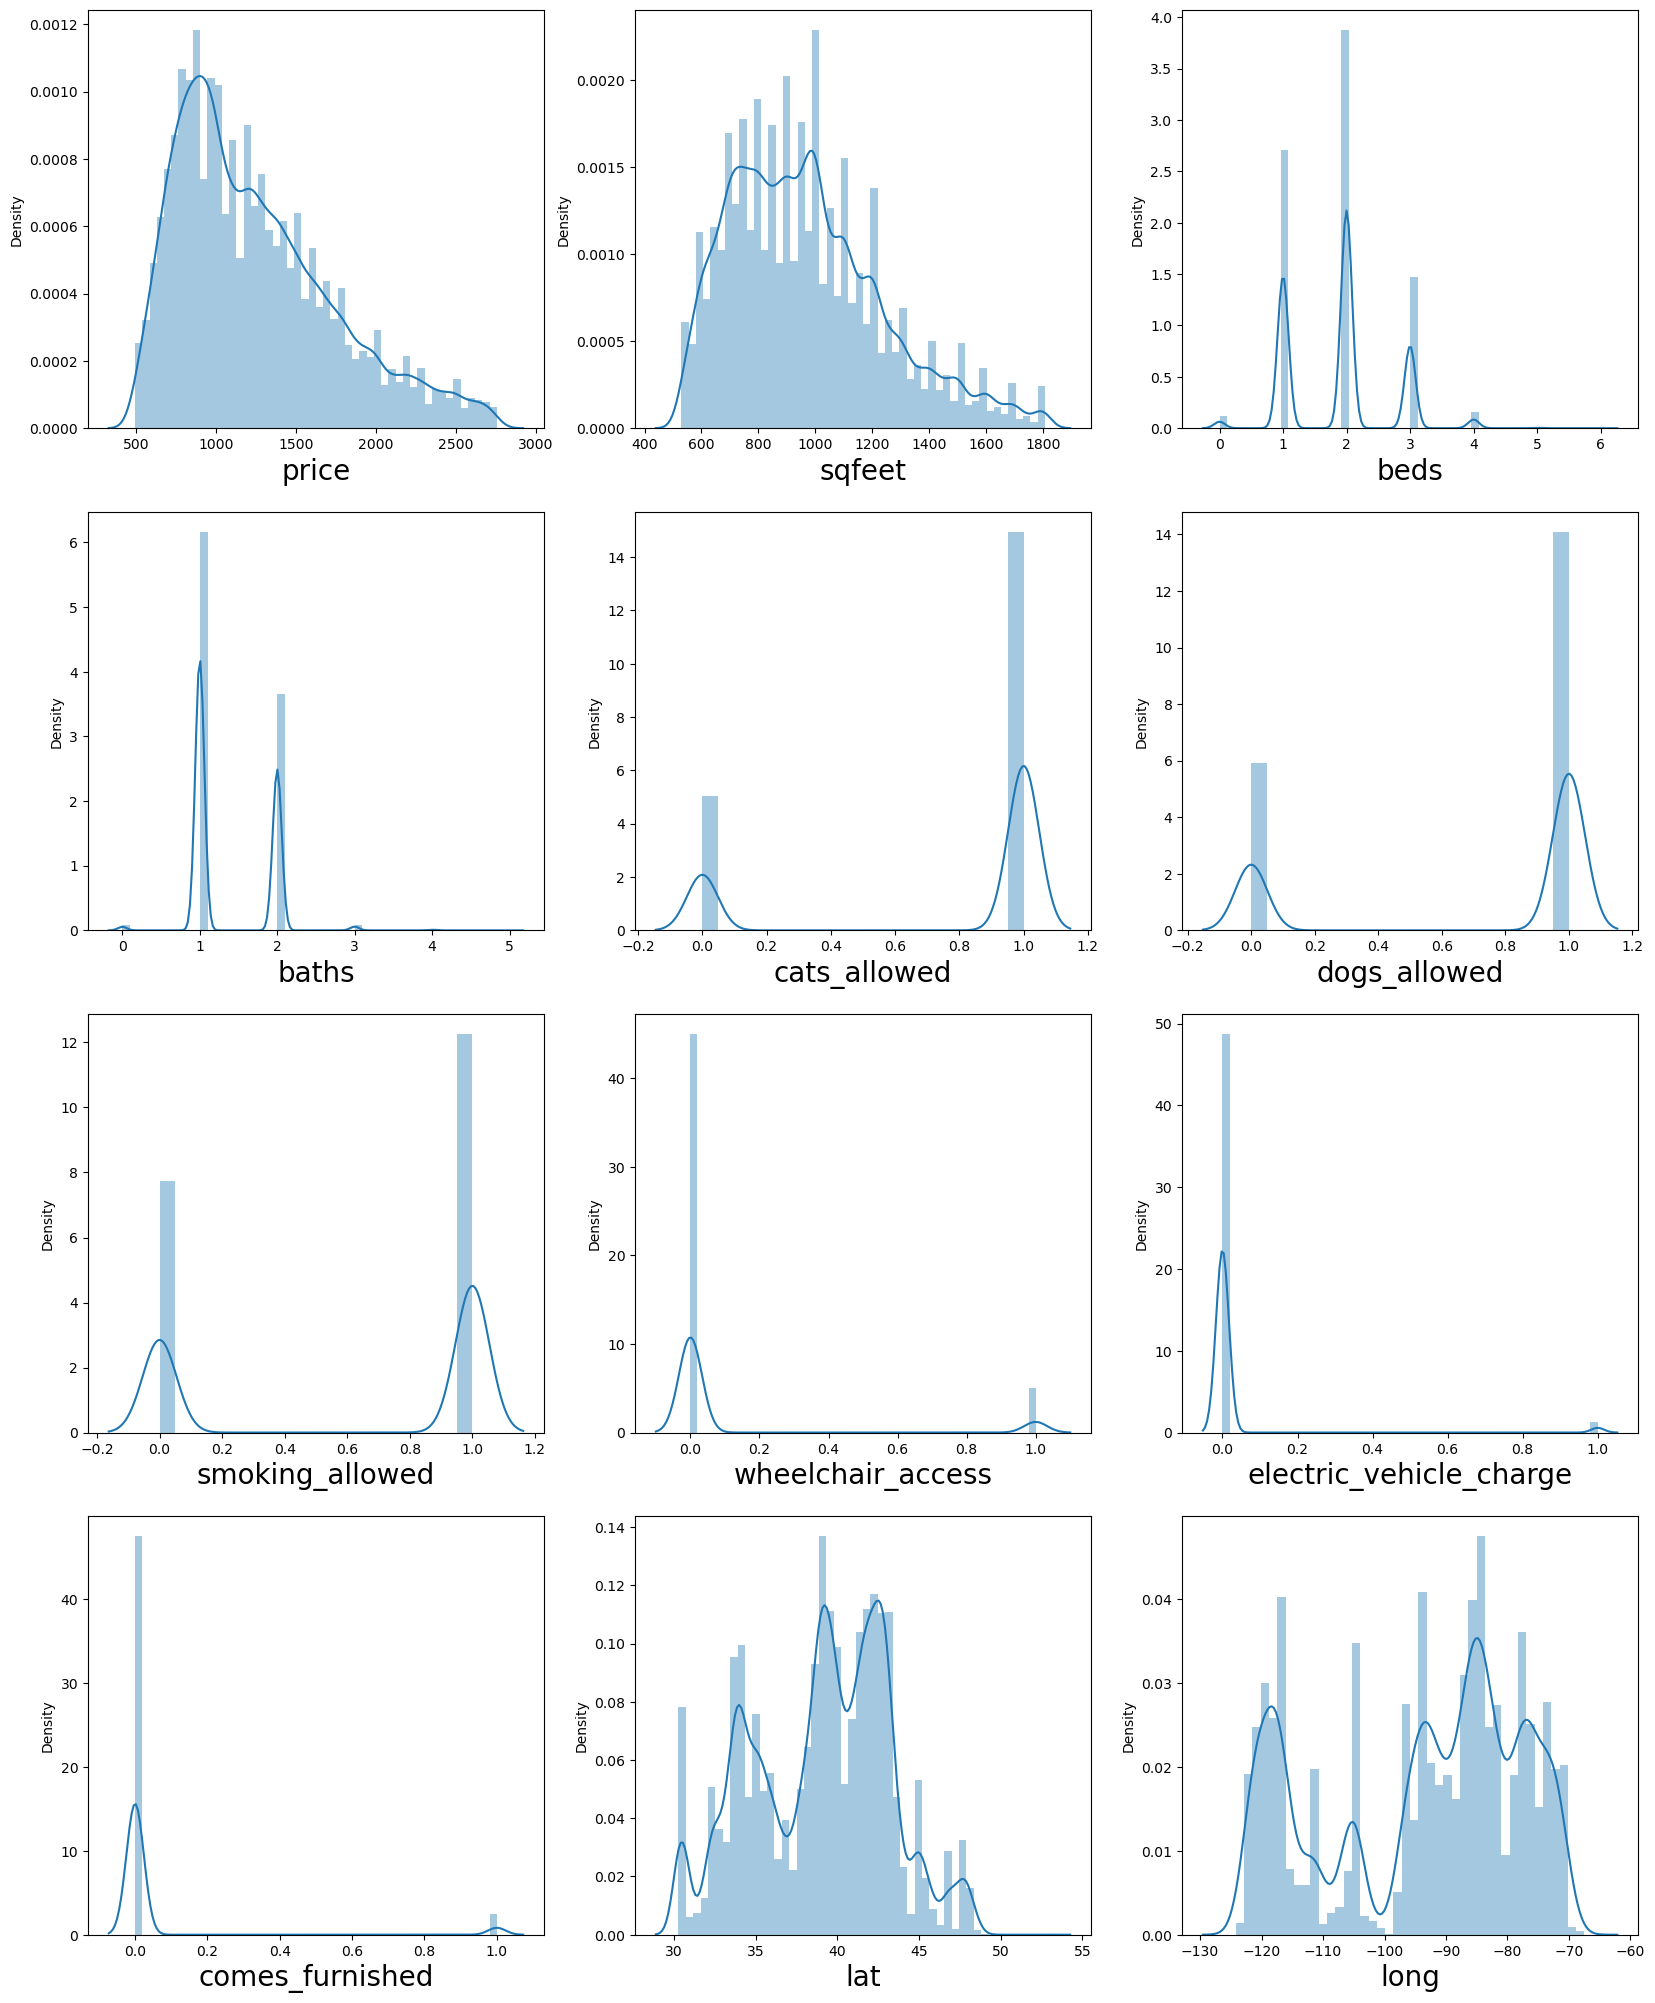

In [95]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in house_train_trial:
    if plotnumber<=13 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(house_train_trial[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

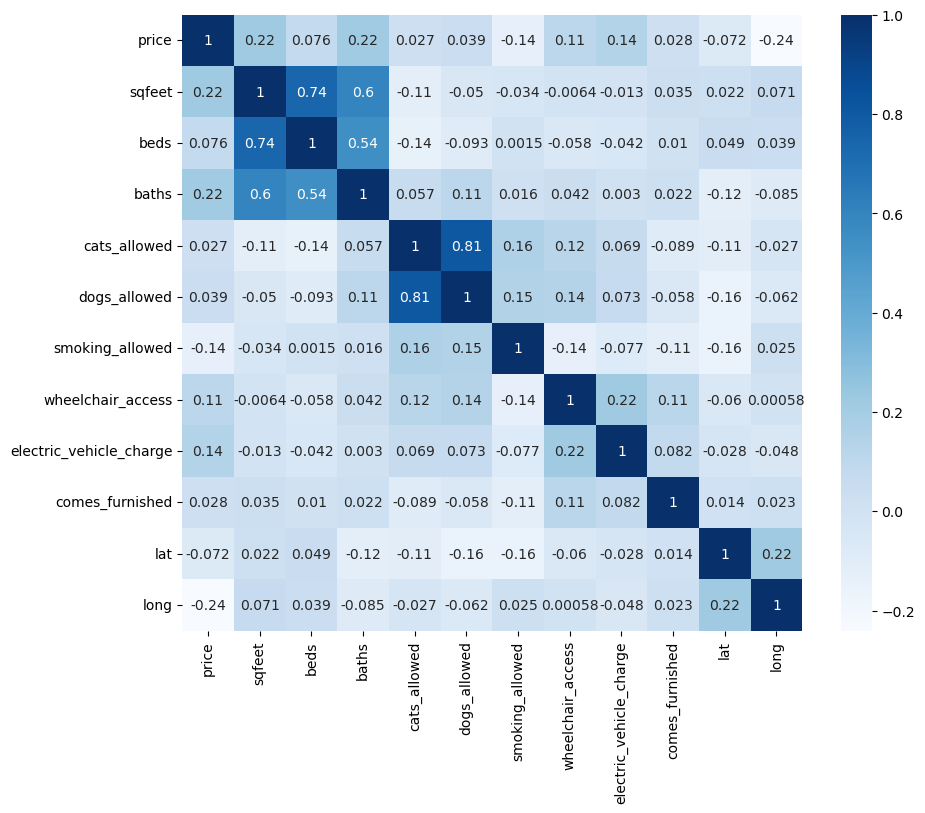

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(house_train_trial.corr(), annot=True,cmap='Blues')
plt.show

In [ ]:
sns.scatterplot(house)

<function matplotlib.pyplot.show(close=None, block=None)>

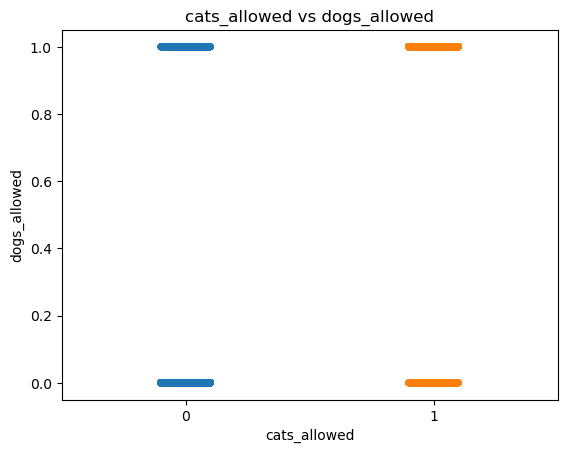

In [102]:
#make sure cats_allowed and dogs_allowed have correlaton using scatterplot

sns.stripplot(house_train_trial.cats_allowed,house_train_trial.dogs_allowed)
plt.xlabel('cats_allowed')
plt.ylabel('dogs_allowed')
plt.title('cats_allowed vs dogs_allowed')
plt.show

In [214]:
#Lets Drop region column
house_train_trial=house_train_trial.drop(columns=['cats_allowed'])

In [215]:
X = house_train_trial.drop(columns = ['price'])
y = house_train_trial['price']

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [219]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=1)

In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
regression = RandomForestRegressor()

regression.fit(x_train,y_train)

RandomForestRegressor()

In [224]:
regression.score(x_train,y_train)  # Adj R2

0.9761027441793899

In [225]:
regression.score(x_test,y_test)  # Adj R2

0.8462574543949155

In [231]:
y_pred=regression.predict(x_test)

In [227]:
from sklearn.metrics import accuracy_score

In [234]:
#Metrics
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

MAE: 119.11706456195463
MSE: 36791.00852214204


## Hyper parameter tuning

Here we are using GridSearchCV for hypertuning the model

In [124]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':[11,12],
    'min_samples_split':range(3,8),
    'min_samples_leaf':range(2,8),
}

In [125]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=2,
                    n_jobs =-1)

In [126]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 12], 'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 8)})

In [127]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [128]:
clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split =3,max_depth= 12, min_samples_leaf= 2)

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       min_samples_split=3)

In [130]:
y_pred = clf.predict(x_test)

In [131]:
accuracy_score(y_test,y_pred)

0.0902230078868643